Q1. NumPy – Array Operations


In [2]:
import numpy as np

np.random.seed(0)
array = np.random.randint(10, 101, size=(5, 5))
print("Original Array:\n", array)

Original Array:
 [[54 57 74 77 77]
 [19 93 31 46 97]
 [80 98 98 22 68]
 [75 49 97 56 98]
 [91 47 35 87 82]]


In [3]:
even_mask = array % 2 == 0
array_with_neg1 = np.where(even_mask, -1, array)
print("\nArray with even numbers replaced by -1:\n", array_with_neg1)


Array with even numbers replaced by -1:
 [[-1 57 -1 77 77]
 [19 93 31 -1 97]
 [-1 -1 -1 -1 -1]
 [75 49 97 -1 -1]
 [91 47 35 87 -1]]


In [4]:
row_sum = np.sum(array_with_neg1, axis=1)
col_sum = np.sum(array_with_neg1, axis=0)
row_mean = np.mean(array_with_neg1, axis=1)
col_mean = np.mean(array_with_neg1, axis=0)

print("\nRow-wise Sum:", row_sum)
print("Column-wise Sum:", col_sum)
print("Row-wise Mean:", row_mean)
print("Column-wise Mean:", col_mean)


Row-wise Sum: [209 239  -5 219 259]
Column-wise Sum: [183 245 161 161 171]
Row-wise Mean: [41.8 47.8 -1.  43.8 51.8]
Column-wise Mean: [36.6 49.  32.2 32.2 34.2]


In [5]:
flattened_sorted = np.sort(array_with_neg1.flatten())[::-1]
print("\nFlattened & Sorted Array (Descending):\n", flattened_sorted)


Flattened & Sorted Array (Descending):
 [97 97 93 91 87 77 77 75 57 49 47 35 31 19 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


Q2: Pandas – Data Handling & Analysis

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
file_path = '/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv'
df = pd.read_csv(file_path)

In [16]:
print("Original Dataset (first 5 rows):")
print(df.head())

Original Dataset (first 5 rows):
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Overall_Score Result  
0      72.666667   Pass  
1      82.333333   Pass  
2      92.666667   Pass  
3      49.33333

In [11]:
mean_scores = df[['math score', 'reading score', 'writing score']].mean()
median_scores = df[['math score', 'reading score', 'writing score']].median()
std_scores = df[['math score', 'reading score', 'writing score']].std()

print("Mean:\n", mean_scores)
print("\nMedian:\n", median_scores)
print("\nStandard Deviation:\n", std_scores)

Mean:
 math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

Median:
 math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

Standard Deviation:
 math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


In [12]:
df['Overall_Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


In [15]:
df['Result'] = df.apply(lambda x: 'Pass' if (x['math score'] >= 40 and x['reading score'] >= 40 and x['writing score'] >= 40) else 'Fail', axis=1)


In [17]:
print("\nDataset with 'Overall_Score' and 'Result' columns (first 5 rows):")
print(df[['math score', 'reading score', 'writing score', 'Overall_Score', 'Result']].head())



Dataset with 'Overall_Score' and 'Result' columns (first 5 rows):
   math score  reading score  writing score  Overall_Score Result
0          72             72             74      72.666667   Pass
1          69             90             88      82.333333   Pass
2          90             95             93      92.666667   Pass
3          47             57             44      49.333333   Pass
4          76             78             75      76.333333   Pass


In [13]:
grouped = df.groupby(['gender', 'parental level of education'])[['math score', 'reading score', 'writing score']].mean()
print("\nGroup-wise average scores:\n", grouped)



Group-wise average scores:
                                     math score  reading score  writing score
gender parental level of education                                          
female associate's degree            65.250000      74.120690      74.000000
       bachelor's degree             68.349206      77.285714      78.380952
       high school                   59.351064      68.202128      66.691489
       master's degree               66.500000      76.805556      77.638889
       some college                  65.406780      73.550847      74.050847
       some high school              59.296703      69.109890      68.285714
male   associate's degree            70.764151      67.433962      65.405660
       bachelor's degree             70.581818      68.090909      67.654545
       high school                   64.705882      61.480392      58.539216
       master's degree               74.826087      73.130435      72.608696
       some college                  69.009259 

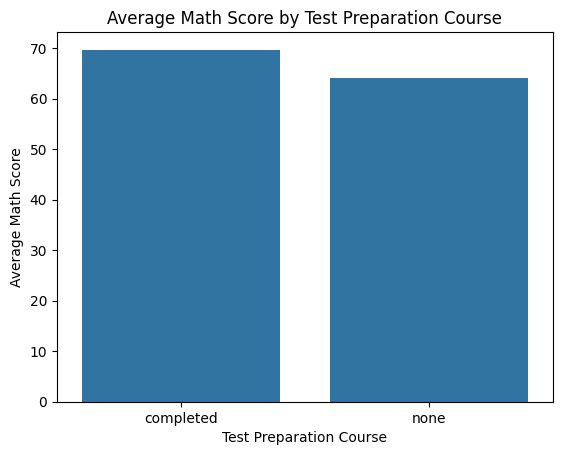

In [14]:
avg_math_scores = df.groupby('test preparation course')['math score'].mean().reset_index()

sns.barplot(x='test preparation course', y='math score', data=avg_math_scores)
plt.title("Average Math Score by Test Preparation Course")
plt.ylabel("Average Math Score")
plt.xlabel("Test Preparation Course")
plt.show()

Q3: SciPy – Optimization and Linear Algebra

In [18]:
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt


In [19]:
A = np.array([[3, 2],
              [4, -1]])

b = np.array([16, 9])

solution = linalg.solve(A, b)

print("Solution to the system of equations:")
print(f"x = {solution[0]:.2f}, y = {solution[1]:.2f}")

Solution to the system of equations:
x = 3.09, y = 3.36


In [23]:
f = lambda x: (x - 3)**2 + 2

result = optimize.minimize(f, x0=0)

print("\nOptimization Result:")
print(f"Minimum at x = {result.x[0]:.4f}")
print(f"Minimum value f(x) = {result.fun:.4f}")



Optimization Result:
Minimum at x = 3.0000
Minimum value f(x) = 2.0000


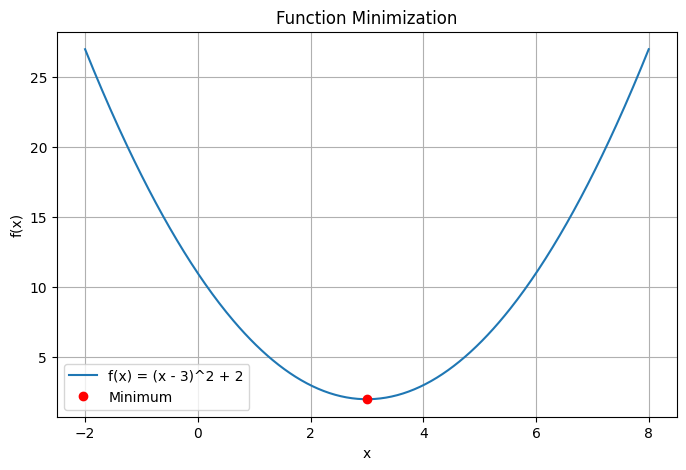

In [24]:
x_vals = np.linspace(-2, 8, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='f(x) = (x - 3)^2 + 2')
plt.plot(result.x, result.fun, 'ro', label='Minimum')
plt.title("Function Minimization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

Q4. Implement Logistic Regression and kNN on the Iris dataset (Scikit-learn).

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
iris = load_iris()
X = iris.data
y = iris.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


In [30]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [31]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")



--- Logistic Regression ---
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
evaluate_model(y_test, y_pred_knn, "k-Nearest Neighbors")



--- k-Nearest Neighbors ---
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

